In [97]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [76]:
train = pd.read_csv('data/titanic/train.csv')
# test = pd.read_csv('data/titanic/test.csv')

In [77]:
train.head()
# SibSp - number of siblings or spouses on the board
# Parch - number of parents or children on the board

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's use seaborn to vizualize missing data using heatmap(). Each yellow line is NaN value

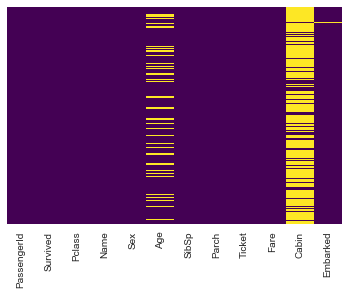

In [78]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

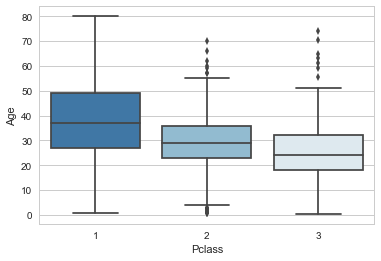

In [79]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [80]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
    
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

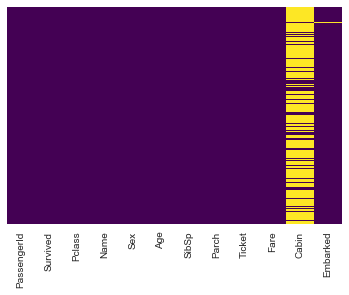

In [81]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [82]:
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

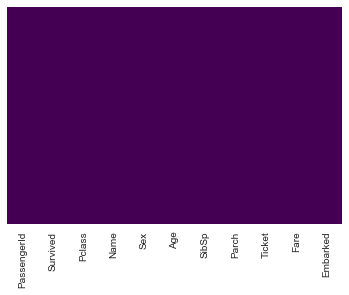

In [83]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [84]:
train = pd.concat([train ,pd.get_dummies(train[['Sex','Embarked']], drop_first=True, prefix=None)], axis=1)

We are going to drop:
* Cabin - too much missing data
* Name - There is no much use in it (we could try to extract title tho) 
* Ticket
* Sex - as we already have binary-value column with age
* Embarked - same as above
* PassengerId - it's useless to our model and we already have everything indexed

In [85]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'PassengerId'],axis=1, inplace=True)

In [86]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)
test.dropna(inplace=True)
test = pd.concat([test ,pd.get_dummies(test[['Sex','Embarked']], drop_first=True, prefix=None)], axis=1)
test.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'PassengerId', 'Cabin'],axis=1, inplace=True)

test.head()

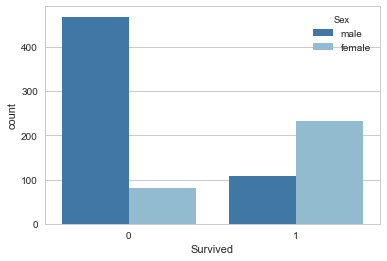

In [47]:
sns.countplot(x='Survived', hue='Sex', data=train)

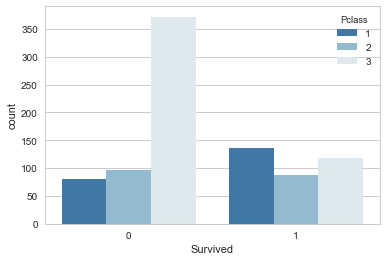

In [48]:
sns.countplot(x='Survived', hue='Pclass', data=train)

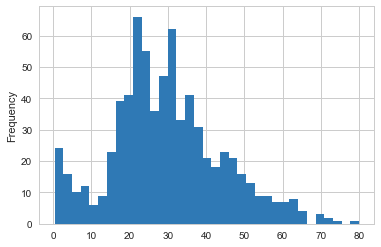

In [49]:
train['Age'].plot.hist(bins = 35)

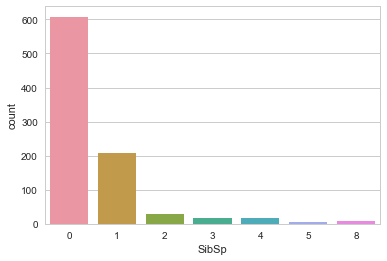

In [50]:
sns.countplot(x='SibSp', data=train)

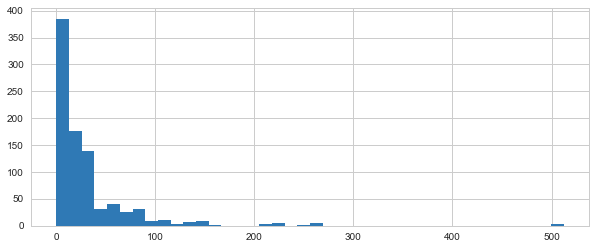

In [51]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [99]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [100]:
logmodel = LogisticRegression()

In [101]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
predictions = logmodel.predict(X_test)

In [103]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       168
          1       0.74      0.65      0.69        99

avg / total       0.78      0.79      0.78       267



In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(y_test, predictions)

array([[146,  22],
       [ 35,  64]])

In [106]:
predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [107]:
y_test

487    0
403    0
724    1
578    0
864    0
310    1
234    0
473    1
352    0
792    0
811    0
731    0
55     1
199    0
513    1
411    0
155    0
389    1
664    1
412    1
85     1
263    0
667    0
650    0
472    1
684    0
178    0
784    0
609    1
424    0
      ..
225    0
130    0
186    1
129    0
720    1
333    0
319    1
221    0
733    0
532    0
702    0
888    0
166    1
288    1
448    1
766    0
760    0
416    1
271    1
848    0
636    0
128    1
467    0
187    1
63     0
413    0
647    1
495    0
196    0
670    1
Name: Survived, Length: 267, dtype: int64